Trabalho de Finanças I

Nome: Nick Maciel Alexander

0- Importação das bibiliotecas que serão utilizadas.

In [192]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


1- Seleção de Ativos:

-PETR4.SA
-ODPV3.SA
-VIVA3.SA

A seleção desses ativos foi com a finalidade de diminuir o risco idiossincrático, a partir da escolha de 3 ativos em setores de atuação diferentes (promovendo a diversificação do portifólio).

Petrobras (Petróleo, Gás e Biocombustível)

OdontoPrev (Saúde)

Vivara (Consumo e Varejo)

In [193]:
ativos = ["PETR4.SA", "ODPV3.SA", "VIVA3.SA"]

2- Período de Análise:

Será analisado apenas a partir de 2022 (a fim de não considerar o período de pandemia nos cálculos, que poderá atribuir certo enviesamento nos resultados), e a frequência dos dados será diária (com o intuito de colher uma amostra de tamanho suficiente).

Obs: será utilizado o "Adjusted Close" para ter uma análise mais completa dos preços (que leva em consideração dividendos e "stock splits", por exemplo)

In [194]:
df = yf.download(ativos, start = '2022-01-01')["Adj Close"].dropna()
df

[*********************100%***********************]  3 of 3 completed


,ODPV3.SA,PETR4.SA,VIVA3.SA
Date,,,
2022-01-03,10.072249,12.735185,23.404459
2022-01-04,9.948613,12.783341,22.401548
2022-01-05,9.800251,12.288643,21.099691
2022-01-06,9.899158,12.279886,21.350420
2022-01-07,9.882675,12.336799,21.311848
...,...,...,...
2024-06-14,11.180000,34.680000,20.350000
2024-06-17,10.960000,34.810001,19.950001
2024-06-18,11.270000,35.900002,19.830000


In [195]:
df_ativos = yf.download(ativos, start = '2022-01-01')['Adj Close'] 
df_ativos.tail()


[*********************100%***********************]  3 of 3 completed


,ODPV3.SA,PETR4.SA,VIVA3.SA
Date,,,
2024-06-14,11.18,34.680000,20.350000
2024-06-17,10.96,34.810001,19.950001
2024-06-18,11.27,35.900002,19.830000
2024-06-19,11.26,35.930000,20.280001
2024-06-20,11.25,36.500000,20.070000


3- Ativo sem risco: 

Será utilizado a Taxa Selic atual (10.50%)

In [196]:
selic_anual = 0.105

4- Estatísticas Descritivas:

Foi calculado os retornos diários das ações e, posteriormente, foram calculados as médias, desvios padrões, medianas, variâncias, etc.

In [197]:
#Retornos Diários
retorno = df.pct_change().dropna()
retorno

,ODPV3.SA,PETR4.SA,VIVA3.SA
Date,,,
2022-01-04,-0.012275,0.003781,-0.042851
2022-01-05,-0.014913,-0.038699,-0.058115
2022-01-06,0.010092,-0.000713,0.011883
2022-01-07,-0.001665,0.004635,-0.001807
2022-01-10,-0.017515,-0.006033,-0.027149
...,...,...,...
2024-06-14,-0.000894,-0.021997,0.018519
2024-06-17,-0.019678,0.003749,-0.019656
2024-06-18,0.028285,0.031313,-0.006015


In [198]:
#Cálculo de média, desvio padrão e mediana
estatísticas_descritivas = retorno.describe()
estatísticas_descritivas

,ODPV3.SA,PETR4.SA,VIVA3.SA
count,615.000000,615.000000,615.000000
mean,0.000393,0.001966,0.000065
std,0.020608,0.022416,0.025060
min,-0.099507,-0.091993,-0.140299
25%,-0.010180,-0.009930,-0.015301
50%,0.000000,0.002265,0.000489
75%,0.011436,0.015261,0.014927
max,0.068966,0.079866,0.095644


In [199]:
#Cálculo da variância
variancia_ativos = np.var(retorno)
variancia_ativos

ODPV3.SA    0.000424
PETR4.SA    0.000502
VIVA3.SA    0.000627
dtype: float64

Observa-se que a Vivara possui a maior variância e menor retorno histórico, enquanto a Petrobras possui o maior retorno histórico com uma variância entre os outros 2 ativos. Percebe-se também que todas as medianas são extremamente próximos de 0.

5- Apresentação Gráfica:

Foi plotado um gráfico de linhas para cada ativo e seu retorno, como também um com o 3 ativos. Também foi plotado um histograma para cada ativo.

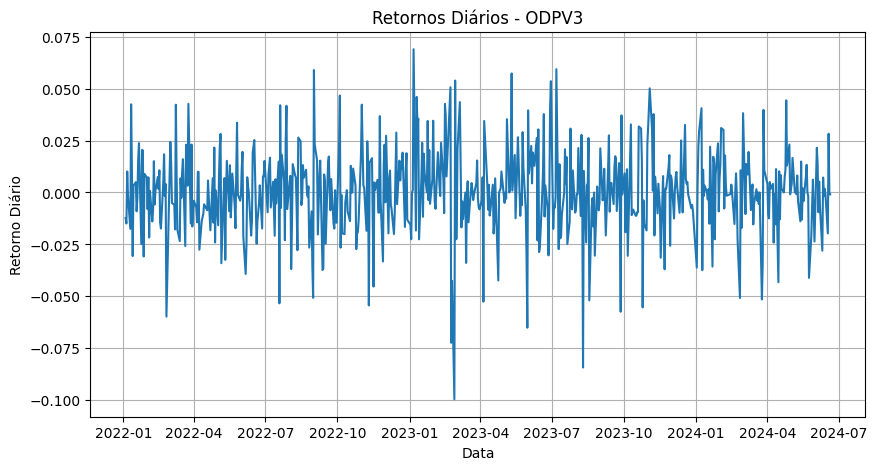

In [200]:
#Retorno Diário da Odontoprev
plt.figure(figsize = (10, 5))
plt.plot(retorno.index, retorno['ODPV3.SA'])
plt.title('Retornos Diários - ODPV3')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.grid(True)

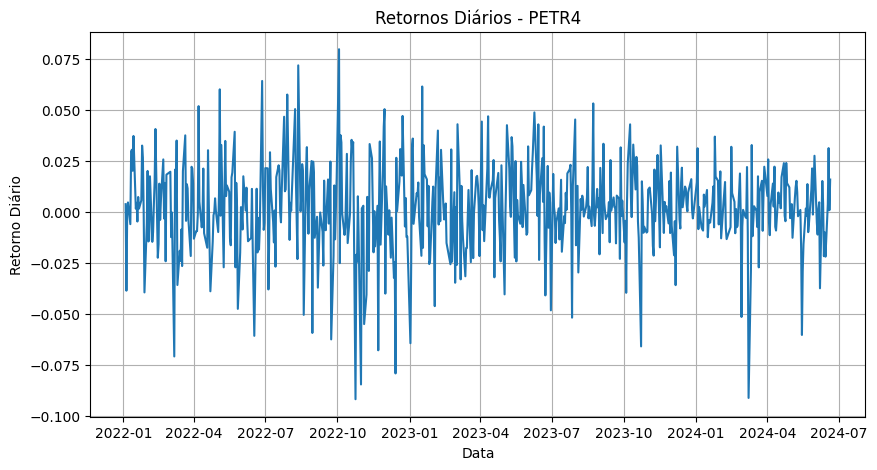

In [201]:
#Retorno Diário da Petrobras
plt.figure(figsize = (10, 5))
plt.plot(retorno.index, retorno['PETR4.SA'])
plt.title('Retornos Diários - PETR4')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.grid(True)

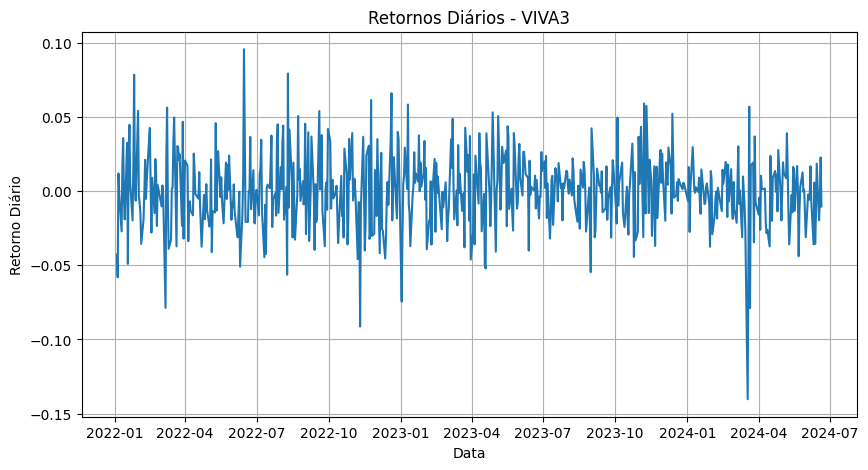

In [202]:
#Retorno Diário da Vivara
plt.figure(figsize = (10, 5))
plt.plot(retorno.index, retorno['VIVA3.SA'])
plt.title('Retornos Diários - VIVA3')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.grid(True)

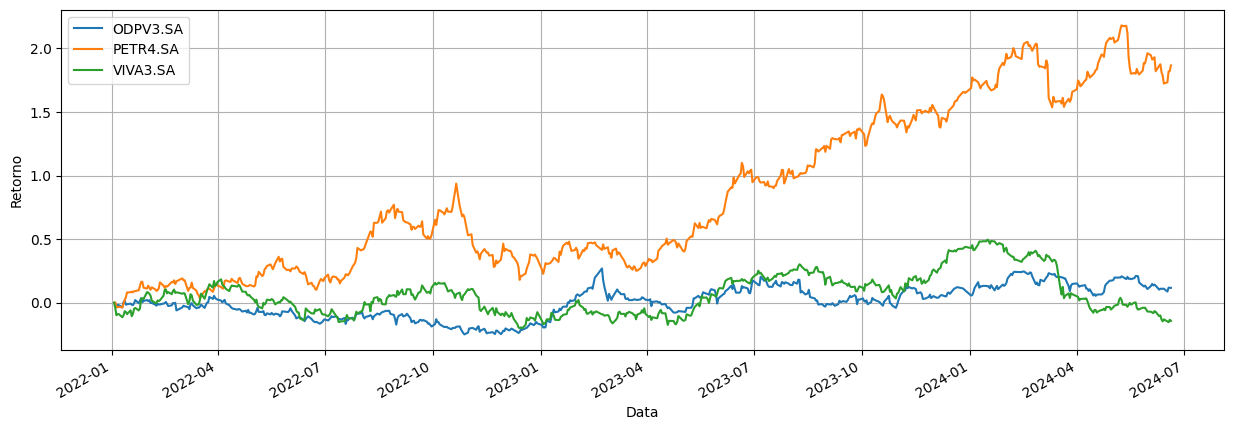

In [203]:
#Retorno Total desde 2022-01-01
dados1 = (df_ativos / df_ativos.iloc[0])-1
dados1 = dados1.dropna()
dados1.plot(figsize = (15, 5))
plt.ylabel('Retorno')
plt.xlabel('Data')
plt.legend(dados1.columns)
plt.grid(True)
plt.show()

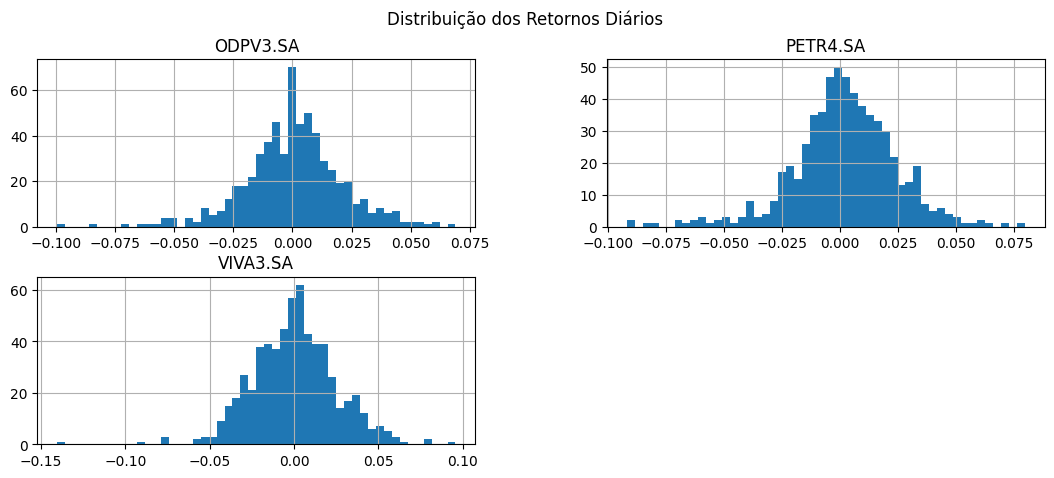

In [204]:
#Histograma do Retorno Diário de cada ativo
retorno.hist(bins=50, figsize=(13, 5))
plt.suptitle('Distribuição dos Retornos Diários')
plt.show()

Encontra-se visualmente as mesmas conclusões anteriores, com a Vivara possuindo um momento histórico aproximadamente em 03-2024 em que houve um retorno excepcional, podendo influenciar os cálculos da variância, por exemplo.

6- Análise de Correlação:

Foi estabelecido uma tabela de correlação entre os ativos, como também uma matriz de correlação.

In [205]:
#Cálculo das correlações
correlacao = retorno.corr()
correlacao

,ODPV3.SA,PETR4.SA,VIVA3.SA
ODPV3.SA,1.000000,0.068395,0.326950
PETR4.SA,0.068395,1.000000,0.208004
VIVA3.SA,0.326950,0.208004,1.000000


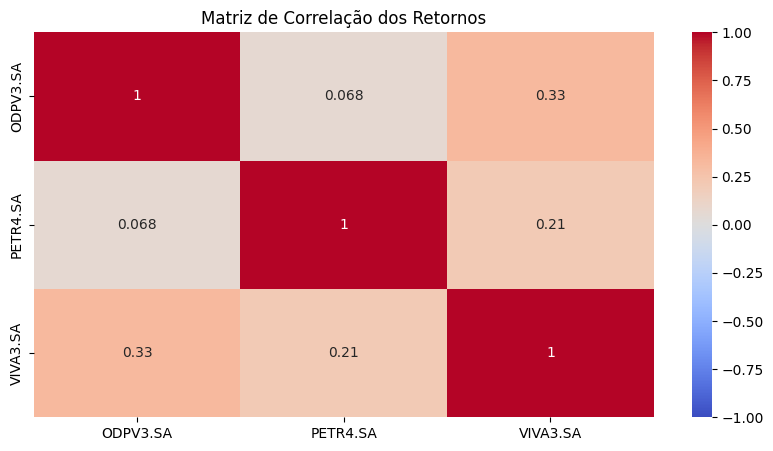

In [206]:
#Criação do Mapa de Calor das correlações
plt.figure(figsize=(10, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação dos Retornos')
plt.show()

Como evidenciado, não há correlações altas expostas entre esses ativos, podendo aumentar a volatilidade da carteira. Com isso, a diversificação entre esses ativos está presente e será fundamental em eliminar os riscos idiossincráticos.

7- Hipóteses de Retorno:

Para utilizar o retorno esperado, foi suposto que será a média do retorno histórico do ativo.

8- Inclusão do Ativo Livre de Risco:

In [207]:
 # Convertendo a selic para taxa diária
selic_diaria = (1 + selic_anual) ** (1/252) - 1  
retornos_ajustados = retorno.subtract(selic_diaria, axis=0)
retornos_ajustados.describe()

,ODPV3.SA,PETR4.SA,VIVA3.SA
count,615.000000,615.000000,615.000000
mean,-0.000003,0.001570,-0.000331
std,0.020608,0.022416,0.025060
min,-0.099903,-0.092390,-0.140696
25%,-0.010576,-0.010326,-0.015697
50%,-0.000396,0.001869,0.000093
75%,0.011040,0.014865,0.014530
max,0.068569,0.079470,0.095248


In [208]:
variancia_ativos1 = np.var(retornos_ajustados)
variancia_ativos1

ODPV3.SA    0.000424
PETR4.SA    0.000502
VIVA3.SA    0.000627
dtype: float64

9- Fronteira Eficiente:

In [209]:
#Nomeando as Variáveis
retornos_variavel = []
volatilidade_variavel = []
carteiras = 50000
sharpe_variavel = []
cov_portifolio = retorno.cov()
peso_variavel = []

In [210]:
#Cálculo de Sharpe, Risco e Retorno
for _ in range (carteiras):
  pesos = np.random.random(len(ativos))
  pesos /= np.sum(pesos)
  retornos = np.dot(pesos,retorno.mean())*252
  volatilidade = np.sqrt(np.dot(pesos.T, np.dot(cov_portifolio, pesos)))*np.sqrt(252)
  sharpe = (retornos-selic_anual)/volatilidade
  retornos_variavel.append(retornos)
  volatilidade_variavel.append(volatilidade)
  sharpe_variavel.append(sharpe)
  peso_variavel.extend(pesos)

In [211]:
#Criação de um dataframe com as possíveis carteiras
portifolio = pd.DataFrame({"Retorno": retornos_variavel,"Risco": volatilidade_variavel, "Sharpe": sharpe_variavel,
                           "ODPV3.SA": peso_variavel[0::len(ativos)],"PETR4.SA": peso_variavel[1::len(ativos)],"VIVA3.SA": peso_variavel[2::len(ativos)]})
portifolio

,Retorno,Risco,Sharpe,ODPV3.SA,PETR4.SA,VIVA3.SA
0,0.228088,0.242839,0.506869,0.540207,0.348764,0.111029
1,0.063576,0.344634,-0.120196,0.101560,0.081039,0.817402
2,0.275456,0.251019,0.679056,0.247270,0.498179,0.254551
3,0.162611,0.250367,0.230105,0.511716,0.217003,0.271281
4,0.196370,0.279021,0.327465,0.122574,0.354607,0.522819
...,...,...,...,...,...,...
49995,0.223976,0.258636,0.460012,0.206795,0.397703,0.395502
49996,0.202498,0.242258,0.402454,0.474333,0.306713,0.218954
49997,0.264554,0.243337,0.655690,0.338811,0.459630,0.201560
49998,0.220974,0.251162,0.461751,0.267902,0.380895,0.351203


In [212]:
#Cálculo dos pontos de Menor Risco e Maior Sharpe
min_index = portifolio['Risco'].idxmin()
min_risco = portifolio.loc[min_index]

max_sharpe = portifolio.loc[sharpe_variavel.index(max(sharpe_variavel))]

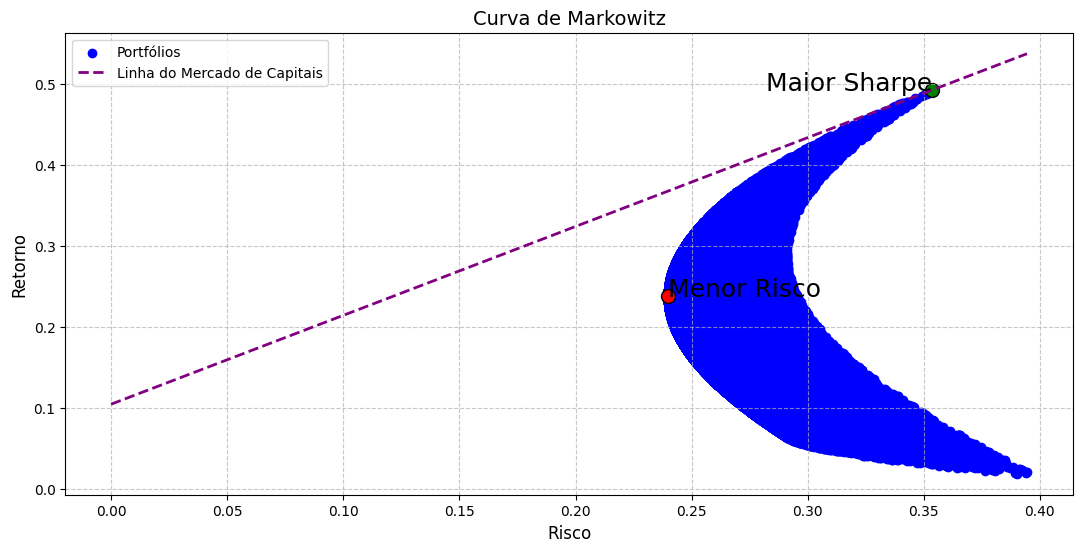

In [213]:
#Plotado a Fronteira de Eficiência
lp = np.array(portifolio).T

plt.figure(figsize=(13, 6))
plt.grid(True, linestyle='--', alpha=0.7)

plt.scatter(lp[1][:], lp[0][:], c='blue', label='Portfólios')
plt.ylabel('Retorno', fontsize=12)
plt.xlabel('Risco', fontsize=12)

plt.scatter(min_risco[1], min_risco[0], color='red', s=100, edgecolors='black')
plt.text(min_risco[1], min_risco[0], 'Menor Risco', fontsize=18, ha='left')

plt.scatter(max_sharpe[1], max_sharpe[0], color='green', s=100, edgecolors='black')
plt.text(max_sharpe[1], max_sharpe[0], 'Maior Sharpe', fontsize=18, ha='right')

x_cml = np.linspace(0, max(lp[1][:]), 100)
y_cml = selic_anual + (max_sharpe[2] * x_cml)
plt.plot(x_cml, y_cml, color='purple', linestyle='--', linewidth=2, label='Linha do Mercado de Capitais')

plt.legend(loc='best')

plt.title('Curva de Markowitz', fontsize=14)

plt.show()

In [214]:
#Carteira de Mercado (Maior Sharpe)
print(portifolio.loc[sharpe_variavel.index(max(sharpe_variavel))])

Retorno     0.492683
Risco       0.353546
Sharpe      1.096557
ODPV3.SA    0.006899
PETR4.SA    0.993093
VIVA3.SA    0.000008
Name: 49367, dtype: float64


In [216]:
#Carteira de Menor Variância
min_risco

Retorno     0.238492
Risco       0.239904
Sharpe      0.556442
ODPV3.SA    0.439564
PETR4.SA    0.387847
VIVA3.SA    0.172590
Name: 10995, dtype: float64

Percebe-se um peso altíssimo na ação da petrobras na carteira de maior sharpe, enquanto na carteira de variância mínima há uma distribuição mais equilibrada. 

10- Análise de Covariância:

[*********************100%***********************]  1 of 1 completed


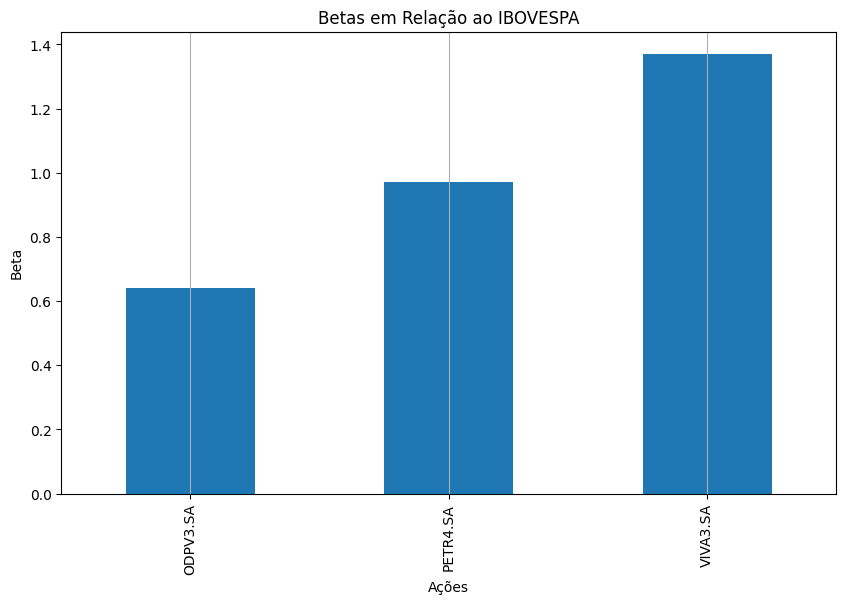

In [215]:
#Comparando os Betas em relação ao IBOVESPA
ibov = yf.download('^BVSP', start = '2023-01-01', end = '2024-01-01')['Adj Close']
ibov_chg = ibov.pct_change()
ibov_var = ibov_chg.var() * 252
retorno['IBOV'] = ibov_chg
dados_chg = retorno.dropna()
covariancias = dados_chg.cov().loc[:, 'IBOV'] * 252
betas = covariancias / ibov_var
betas = betas.drop('IBOV')
plt.figure(figsize=(10, 6))
betas.plot(kind='bar')
plt.title('Betas em Relação ao IBOVESPA')
plt.xlabel('Ações')
plt.ylabel('Beta')
plt.grid(axis='x')
plt.show()

Vivara teve o maior beta encontrado, significando um risco sistemático relativamente alto, enqunto na Odontoprev houve um beta relativamente baixo, significando um risco sistemático relativamente baixo.